In [7]:
suppressWarnings(require('pkgmaker',quietly = T))
require('plyr',quietly = T)
l_ply(c('dplyr',
        'data.table',
        'tictoc',
        'tidyr',  
        'reshape2',
        'factoextra',
        'kableExtra',
        'parallel',
        'doParallel',
        'scales',
        'StatMatch',
        'lattice',
        'utils',
        'missForest',
        'VIM',
        'pcaMethods',
        'pacman',
        'hablar',
        'tibble', 
        'ggplot2'
       ), function(pkg) {
          invisible(capture.output(irequire(pkg, quiet = T, autoinstall = T)))
        })

In [2]:
prodNA <- function(x, noNA = 0.1){
  n <- nrow(x)
  p <- ncol(x)
  NAloc <- rep(FALSE, n*p)
  NAloc[sample(n * p, floor(n * p * noNA))] <- TRUE
  x[matrix(NAloc, nrow = n, ncol = p)] <- NA
  return(x)
}

In [3]:
int_z <- RNAseqData <- fread("./data/protein_intensity_zscore.csv") %>% 
    column_to_rownames('V1')
print(dim(int_z))
head(int_z, 2)

[1] 317 295


,sp|A0AVT1|UBA6_HUMAN,sp|O00170|AIP_HUMAN,sp|O00299|CLIC1_HUMAN,sp|O00429|DNM1L_HUMAN,sp|O00483|NDUA4_HUMAN,sp|O00571|DDX3X_HUMAN,sp|O14828|SCAM3_HUMAN,sp|O14929|HAT1_HUMAN,sp|O15143|ARC1B_HUMAN,sp|O15145|ARPC3_HUMAN,...,sp|Q9Y230|RUVB2_HUMAN,sp|Q9Y285|SYFA_HUMAN,sp|Q9Y2B0|CNPY2_HUMAN,sp|Q9Y2X3|NOP58_HUMAN,sp|Q9Y383|LC7L2_HUMAN,sp|Q9Y4L1|HYOU1_HUMAN,sp|Q9Y5K5|UCHL5_HUMAN,sp|Q9Y5M8|SRPRB_HUMAN,sp|Q9Y5X3|SNX5_HUMAN,sp|Q9Y678|COPG1_HUMAN
CTG-0158,0.2093806,0.65302273,-1.0997903,-0.6676739,-0.4647837,-1.1040398,1.064904,1.2123033,-0.1051954,0.2626795,...,-0.2250597,-0.5820609,0.1906079,0.5237176,0.9304869,1.9736444,-0.1122720,-0.27387703,0.4041529,0.4389799
CTG-0159,-0.1839989,-0.01878222,-0.3120364,-0.9488586,-1.0432424,-0.5989767,-2.682560,-0.3098403,0.3678152,0.5056474,...,0.7999883,-0.2509652,0.1577792,0.4496930,0.3787295,-0.7937075,0.3066905,0.09551761,-0.8271938,0.8381110


In [4]:
n_round <- 5
columns= c("Random_Forest", "kNN", "Singular_Value_Decomposition", "Bayesian_Model") 
scores = data.frame(matrix(nrow = n_round, ncol = length(columns)))
colnames(scores) = columns
scores

Random_Forest,kNN,Singular_Value_Decomposition,Bayesian_Model
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA


In [5]:
# # # Initializes the progress bar
# # pb <- txtProgressBar(min = 0,      # Minimum value of the progress bar
# #                      max = n_round, # Maximum value of the progress bar
# #                      style = 2,    # Progress bar style (also available style = 1 and style = 2)
# #                      width = 50,   # Progress bar width. Defaults to getOption("width")
# #                      char = "=")   # Character used to create the bar

# for (i in 1:n_round){
#     set.seed(i)
#     int_mis <- prodNA(int_z, noNA = 0.1)
#     # random forest
#     imp <- missForest(int_mis)
#     scores[i, 1] <- missForest::nrmse(ximp = imp$ximp, xmis = int_mis, xtrue = int_z)
#     # knn
#     imp <- kNN(int_mis, k = 6)
#     scores[i, 2] <- missForest::nrmse(ximp = imp[, 1: dim(int_z)[2]], 
#                                       xmis = int_mis, xtrue = int_z)
#     # svd
#     imp <- as.data.frame(completeObs(pca(int_mis, method="svdImpute", center = TRUE)))
#     scores[i, 3] <- missForest::nrmse(ximp = imp, xmis = int_mis, xtrue = int_z)
#     # bpca
#     imp <- as.data.frame(completeObs(pca(int_mis, method="bpca", center = TRUE)))
#     scores[i, 4] <- missForest::nrmse(ximp = imp, xmis = int_mis, xtrue = int_z)
    
# #     # Sets the progress bar to the current state
# #     setTxtProgressBar(pb, i)
# }
# # close(pb)
# scores

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!
  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!
  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!
  missForest iteration 5 in progress...done!
  missForest iteration 6 in progress...done!
  missForest iteration 7 in progress...done!
  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!
  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missFore

Random_Forest,kNN,Singular_Value_Decomposition,Bayesian_Model
0.5845051,0.6790997,0.7529036,0.7531014
0.6046860,0.6957348,0.7756565,0.7754456
0.6000733,0.6929203,0.7717674,0.7716799
0.5919605,0.6944777,0.7710974,0.7709042
0.6090384,0.6979003,0.7788277,0.7786009


In [8]:
scores

Random_Forest,kNN,Singular_Value_Decomposition,Bayesian_Model
0.5845051,0.6790997,0.7529036,0.7531014
0.6046860,0.6957348,0.7756565,0.7754456
0.6000733,0.6929203,0.7717674,0.7716799
0.5919605,0.6944777,0.7710974,0.7709042
0.6090384,0.6979003,0.7788277,0.7786009


In [6]:
# write.csv(x=scores, file="./data/imputation_RMSE.csv", row.names=TRUE)

In [20]:
scores_plot <- scores %>% 
    pivot_longer(everything(), names_to = "methods") %>% 
    group_by(methods) %>% 
    summarise(mean=mean(value), sd=sd(value))
scores_plot

methods,mean,sd
Bayesian_Model,0.7699464,0.009909798
kNN,0.6920266,0.007452555
Random_Forest,0.5980526,0.009866900
Singular_Value_Decomposition,0.7700505,0.010081284


In [47]:
max(unlist(int_z)) - min(unlist(int_z))

[1] 17.91648

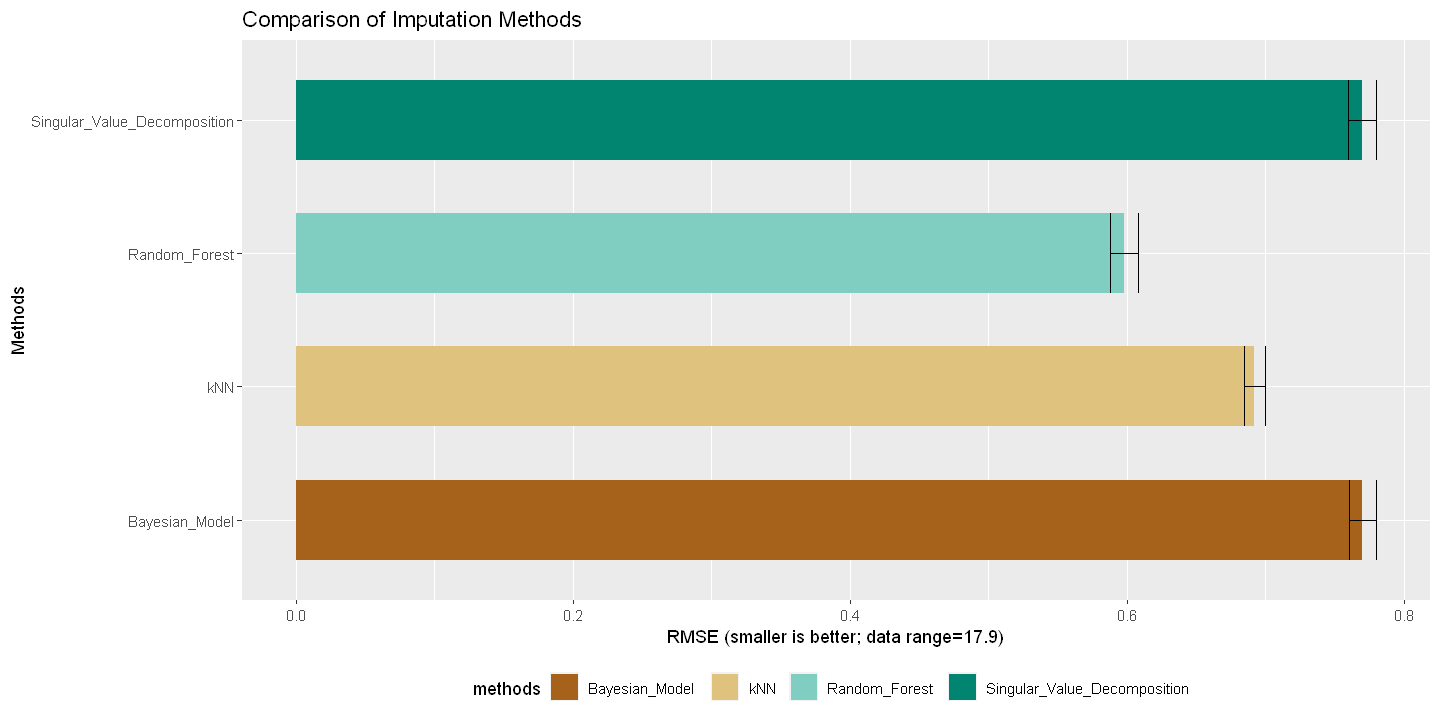

In [56]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(scores_plot, aes(x=methods, y=mean, fill=methods)) +
  geom_bar(stat="identity", width = 0.6) +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width = 0.6) +
  labs(x="Methods", y="RMSE (smaller is better; data range=17.9)", 
         title="Comparison of Imputation Methods") +
  coord_flip() + 
  theme(legend.position="bottom") +
  scale_fill_brewer(palette="BrBG")